# The Simpsons

The Simpsons is an American animated sitcom created by Matt Groening. The series is a satirical depiction of working-class life, epitomized by the Simpson family, which consists of Homer, Marge, Bart, Lisa, and Maggie. The show is set in the fictional town of Springfield and parodies American culture and society, television, and the human condition.

![](https://media1.tenor.com/images/5ec778d813dbd4acc2a743fcc1654fa9/tenor.gif?itemid=15639266)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/simpsons-analysis-wordcloud/bart.png
/kaggle/input/simpsons-analysis-wordcloud/marge1.jpg
/kaggle/input/simpsons-analysis-wordcloud/homer.jpg
/kaggle/input/simpsons-analysis-wordcloud/lisa.jpg
/kaggle/input/simpsons-analysis-wordcloud/homer1.jpg
/kaggle/input/simpsons-analysis-wordcloud/bart1.jpg
/kaggle/input/simpsons-analysis-wordcloud/marge.png
/kaggle/input/simpsons-analysis-wordcloud/lisa1.jpg
/kaggle/input/the-simpsons-dataset/simpsons_episodes.csv
/kaggle/input/the-simpsons-dataset/datapackage.json
/kaggle/input/the-simpsons-dataset/simpsons_script_lines.csv
/kaggle/input/the-simpsons-dataset/simpsons_locations.csv
/kaggle/input/the-simpsons-dataset/simpsons_characters.csv


# Imports

In [2]:
!pip install NRCLex

     |████████████████████████████████| 572 kB 403 kB/s 
  Created wheel for NRCLex: filename=NRCLex-2.0.2-py3-none-any.whl size=230767 sha256=7aee33c26eb9a46b67b3ebf0101d4fa322e3379b08e38f9104395d83435759fb
  Stored in directory: /root/.cache/pip/wheels/21/b0/90/2f9f79ca0cfb6962d865dde89d2836639a8240c90365083cba
Successfully built NRCLex


In [3]:
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly
import plotly.express as px
import numpy as np
import re
import nltk
import plotly.graph_objs as go
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
from PIL import Image
from plotly import tools
from plotly.offline import init_notebook_mode,iplot,plot
from nrclex import NRCLex
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [4]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# A quick look at the data we're working with

In [5]:
df = pd.read_csv('../input/the-simpsons-dataset/simpsons_script_lines.csv')
df.head(5)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.



,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33


In [6]:
df = df.head(6000)

In [7]:
df.shape

(6000, 13)

In [8]:
df = df.dropna()

In [9]:
df['word_count'] = df['word_count'].astype(str).astype(int)

In [10]:
df.dtypes

id                      int64
episode_id              int64
number                  int64
raw_text               object
timestamp_in_ms        object
speaking_line          object
character_id           object
location_id           float64
raw_character_text     object
raw_location_text      object
spoken_words           object
normalized_text        object
word_count              int64
dtype: object

# Text preprocessing

In [11]:
description_list=[]
for description in df['normalized_text']:
    description=re.sub("[^a-zA-Z]", " ", description)
    description=description.lower()
    description=nltk.word_tokenize(description)
    description=[word for word in description if not word in set(stopwords.words("english"))]
    lemma=nltk.WordNetLemmatizer()
    description=[lemma.lemmatize(word) for word in description]
    description=" ".join(description)
    description_list.append(description)
df["normalized_text_new"]=description_list
df.head(5)

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,normalized_text_new
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31,actually little sometimes disease magazine new...
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3,wheres mr bergstrom
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22,dont know although id sure like talk didnt tou...
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5,life worth living
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33,poll open end recess case decided put thought ...


In [12]:
for i,row in df.iterrows():
    print(row['character_id'],row['raw_character_text'])

464.0 Miss Hoover
9.0 Lisa Simpson
464.0 Miss Hoover
9.0 Lisa Simpson
40.0 Edna Krabappel-Flanders
38.0 Martin Prince
40.0 Edna Krabappel-Flanders
8.0 Bart Simpson
9.0 Lisa Simpson
469.0 Landlady
9.0 Lisa Simpson
469.0 Landlady
9.0 Lisa Simpson
469.0 Landlady
9.0 Lisa Simpson
8.0 Bart Simpson
101.0 Nelson Muntz
8.0 Bart Simpson
467.0 Terri/sherri
8.0 Bart Simpson
25.0 Milhouse Van Houten
8.0 Bart Simpson
8.0 Bart Simpson
25.0 Milhouse Van Houten
8.0 Bart Simpson
53.0 Wendell Borton
8.0 Bart Simpson
40.0 Edna Krabappel-Flanders
8.0 Bart Simpson
40.0 Edna Krabappel-Flanders
470.0 Kid Reporter
41.0 Conductor
9.0 Lisa Simpson
465.0 BERGSTROM
9.0 Lisa Simpson
465.0 BERGSTROM
9.0 Lisa Simpson
465.0 BERGSTROM
9.0 Lisa Simpson
465.0 BERGSTROM
9.0 Lisa Simpson
465.0 BERGSTROM
9.0 Lisa Simpson
465.0 BERGSTROM
9.0 Lisa Simpson
465.0 BERGSTROM
465.0 BERGSTROM
9.0 Lisa Simpson
41.0 Conductor
9.0 Lisa Simpson
465.0 BERGSTROM
2.0 Homer Simpson
2.0 Homer Simpson
9.0 Lisa Simpson
1.0 Marge Simpson
9.0 

In [13]:
val_homer=[]
val_bart=[]
val_marge=[]
val_lisa=[]

for i,row in df.iterrows():
    val = row['normalized_text_new']
    if row['character_id'] == 2:
        val_homer.append(val)
    elif row['character_id']== 8:
        val_bart.append(val)
    elif row['character_id'] == 1:
        val_marge.append(val)
    elif row['character_id']== 9:
        val_lisa.append(val)    


In [14]:
pat = r'\b(?:{})\b'.format('|'.join(stop))
def text_cleaning(val_list):
    df1 = DataFrame (val_list,columns =['normalized_text_new']).dropna()
    df1["normalized_text_new"] = df1["normalized_text_new"].str.replace(pat, '')
    df1["normalized_text_new"] = df1["normalized_text_new"].str.replace(r'\s+', ' ')
    return df1

In [15]:
bart = text_cleaning(val_bart)
homer = text_cleaning(val_homer)
marge = text_cleaning(val_marge)
lisa = text_cleaning(val_lisa)

# Word Clouds

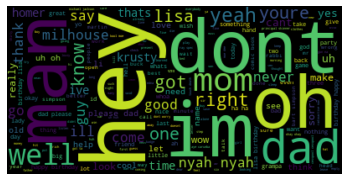

In [16]:
wc = WordCloud()
wc.generate(' '.join(bart['normalized_text_new']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

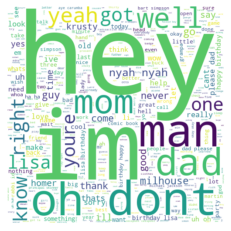

In [17]:
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=500)
wc.generate(' '.join(bart['normalized_text_new']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

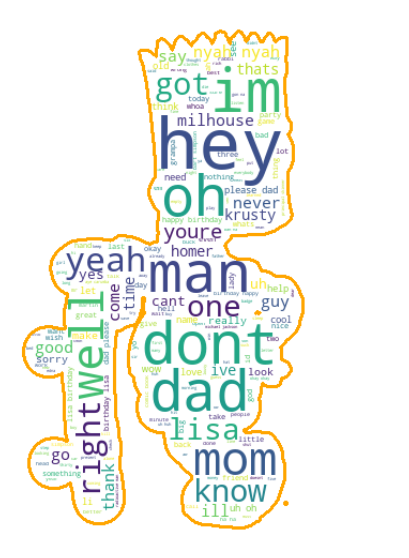

In [18]:
plt.subplots(figsize=(10,10))
mask = np.array(Image.open('../input/simpsons-analysis-wordcloud/bart.png'))
wc = WordCloud(stopwords=STOPWORDS, 
               mask=mask, background_color="white", contour_width=2, contour_color="orange",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(' '.join(bart['normalized_text_new']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

# Unigrams, Bigrams and Trigrams

In [19]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

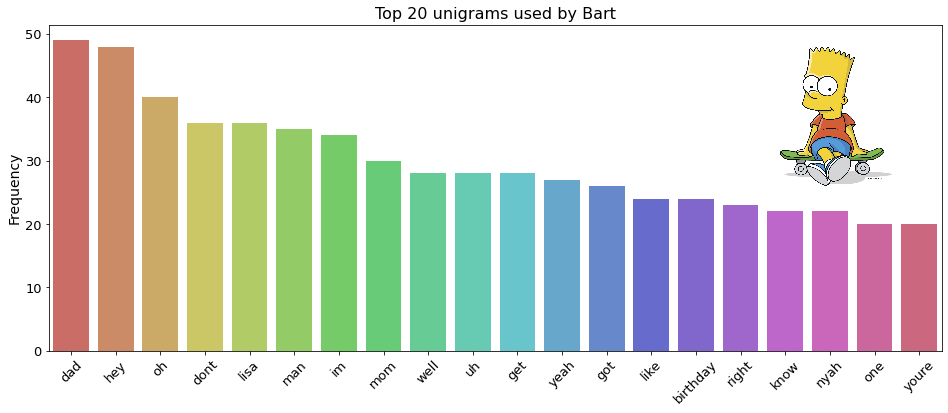

In [20]:
common_words = get_top_n_words(bart['normalized_text_new'], 20)
common_words_df = DataFrame (common_words,columns=['word','freq'])
character_img = mpimg.imread('../input/simpsons-analysis-wordcloud/bart1.jpg')
imagebox = OffsetImage(character_img, zoom=0.07)
xy = (0.5, 0.7)
ab = AnnotationBbox(imagebox, xy,
                    xybox=(17, 37),
                    pad=0.5,frameon=False
                    )
plt.figure(figsize=(16, 6))
ax = sns.barplot(x='word', y='freq', data=common_words_df,palette='hls')
ax.add_artist(ab)

plt.title("Top 20 unigrams used by Bart", fontsize=16)
plt.ylabel("Frequency", fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel("");

In [21]:
common_words = get_top_n_bigram(bart['normalized_text_new'], 20)
df3 = pd.DataFrame(common_words, columns = ['words' ,'count'])
df3.groupby('words').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams used by Bart')

common_words = get_top_n_trigram(bart['normalized_text_new'], 20)
df4 = pd.DataFrame(common_words, columns = ['words' , 'count'])
df4.groupby('words').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams used by Bart')

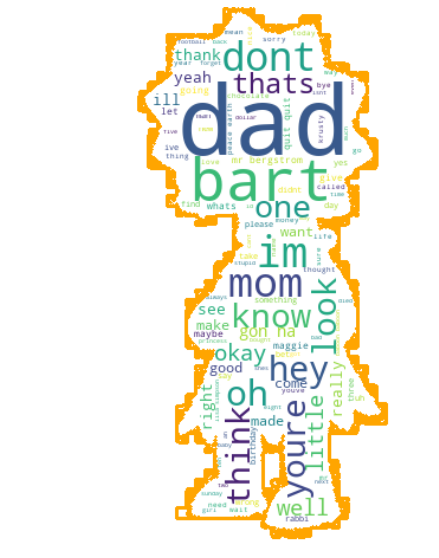

In [22]:
plt.subplots(figsize=(10,10))
mask = np.array(Image.open('../input/simpsons-analysis-wordcloud/lisa.jpg'))
wc = WordCloud(stopwords=STOPWORDS, 
               mask=mask, background_color="white", contour_width=2, contour_color="orange",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(' '.join(lisa['normalized_text_new']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

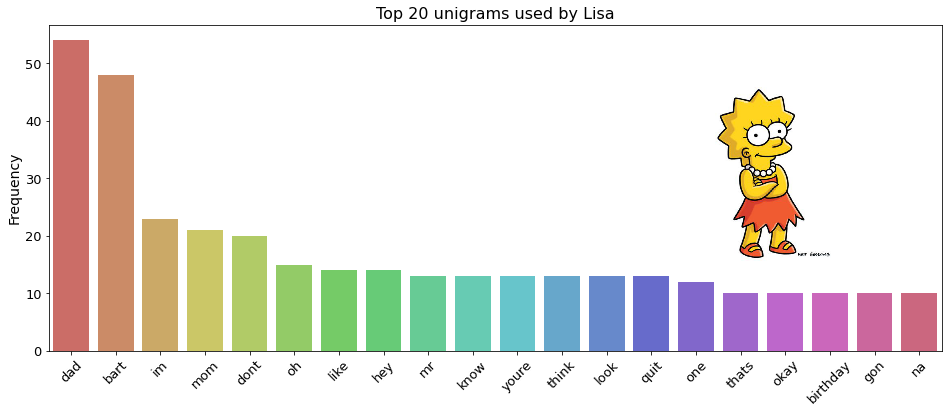

In [23]:
common_words = get_top_n_words(lisa['normalized_text_new'], 20)
common_words_df = DataFrame (common_words,columns=['word','freq'])
character_img = mpimg.imread('../input/simpsons-analysis-wordcloud/lisa1.jpg')
imagebox = OffsetImage(character_img, zoom=0.4)
xy = (0.5, 0.7)
ab = AnnotationBbox(imagebox, xy,
                    xybox=(16, 30),
                    pad=0.5,frameon=False
                    )
plt.figure(figsize=(16, 6))
ax = sns.barplot(x='word', y='freq', data=common_words_df,palette='hls')
ax.add_artist(ab)

plt.title("Top 20 unigrams used by Lisa", fontsize=16)
plt.ylabel("Frequency", fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel("");

In [24]:
common_words = get_top_n_bigram(lisa['normalized_text_new'], 20)
df3 = pd.DataFrame(common_words, columns = ['words' ,'count'])
df3.groupby('words').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams used by Lisa')

common_words = get_top_n_trigram(lisa['normalized_text_new'], 20)
df4 = pd.DataFrame(common_words, columns = ['words' , 'count'])
df4.groupby('words').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams used by Lisa')

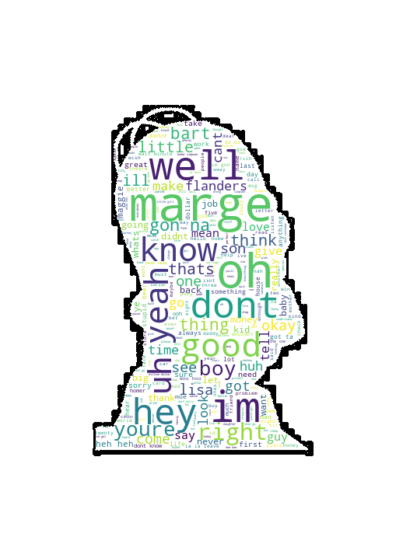

In [25]:
plt.subplots(figsize=(10,10))
mask = np.array(Image.open('../input/simpsons-analysis-wordcloud/homer.jpg'))
wc = WordCloud(stopwords=STOPWORDS, 
               mask=mask, background_color="white", contour_width=2, contour_color="black",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(' '.join(homer['normalized_text_new']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

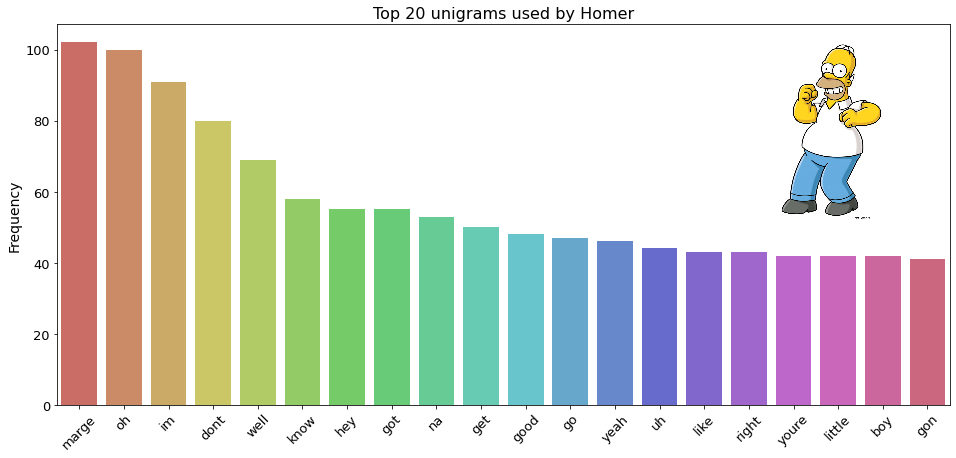

In [26]:
common_words = get_top_n_words(homer['normalized_text_new'], 20)
common_words_df = DataFrame (common_words,columns=['word','freq'])
character_img = mpimg.imread('../input/simpsons-analysis-wordcloud/homer1.jpg')
imagebox = OffsetImage(character_img, zoom=0.2)
xy = (0.5, 0.7)
ab = AnnotationBbox(imagebox, xy,
                    xybox=(17, 78),
                    pad=0.5,frameon=False
                    )
plt.figure(figsize=(16, 7))
ax = sns.barplot(x='word', y='freq', data=common_words_df,palette='hls')
ax.add_artist(ab)

plt.title("Top 20 unigrams used by Homer", fontsize=16)
plt.ylabel("Frequency", fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel("");

In [27]:
common_words = get_top_n_bigram(homer['normalized_text_new'], 20)
df3 = pd.DataFrame(common_words, columns = ['words' ,'count'])
df3.groupby('words').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams used by Homer')

common_words = get_top_n_trigram(homer['normalized_text_new'], 20)
df4 = pd.DataFrame(common_words, columns = ['words' , 'count'])
df4.groupby('words').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams used by Homer')

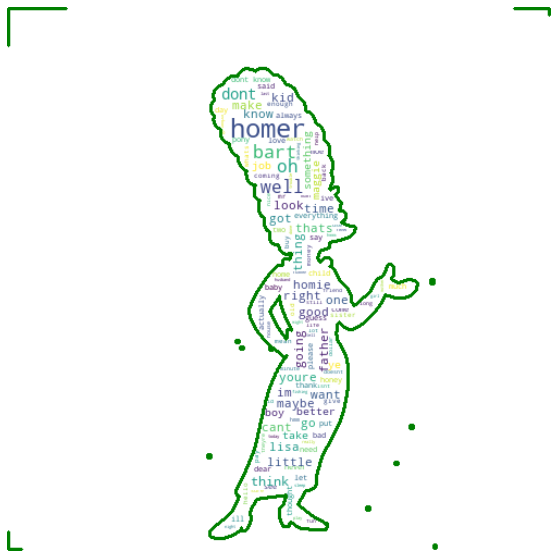

In [28]:
plt.subplots(figsize=(10,10))
mask = np.array(Image.open('../input/simpsons-analysis-wordcloud/marge.png'))
wc = WordCloud(stopwords=STOPWORDS, 
               mask=mask, background_color="white", contour_width=2, contour_color="green",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(' '.join(marge['normalized_text_new']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

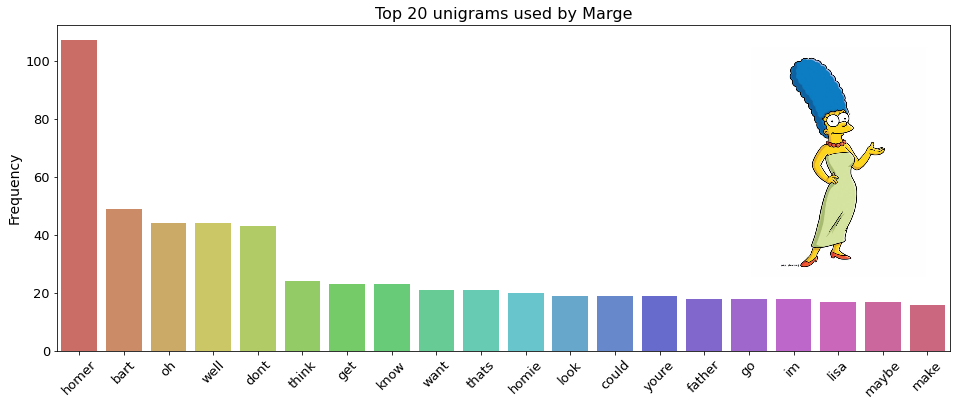

In [29]:
common_words = get_top_n_words(marge['normalized_text_new'], 20)
common_words_df = DataFrame (common_words,columns=['word','freq'])

character_img = mpimg.imread('../input/simpsons-analysis-wordcloud/marge1.jpg')
imagebox = OffsetImage(character_img, zoom=0.18)
xy = (0.5, 0.7)
ab = AnnotationBbox(imagebox, xy,
                    xybox=(17, 65),
                    pad=0.5,frameon=False
                    )
plt.figure(figsize=(16, 6))
ax = sns.barplot(x='word', y='freq', data=common_words_df,palette='hls')
ax.add_artist(ab)

plt.title("Top 20 unigrams used by Marge", fontsize=16)
plt.ylabel("Frequency", fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel("");

In [30]:
common_words = get_top_n_bigram(marge['normalized_text_new'], 20)
df3 = pd.DataFrame(common_words, columns = ['words' ,'count'])
df3.groupby('words').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams used by Marge')

common_words = get_top_n_trigram(marge['normalized_text_new'], 20)
df4 = pd.DataFrame(common_words, columns = ['words' , 'count'])
df4.groupby('words').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams used by Marge')

# NRCLex
NRCLex will measure emotional affect from a body of text. Affect dictionary contains approximately 27,000 words, and is based on the National Research Council Canada (NRC) affect lexicon and the NLTK library's WordNet synonym sets.

Emotional affects measured include the following:

* fear
* anger
* anticipation
* trust
* surprise
* positive
* negative
* sadness
* disgust
* joy

In [31]:
text_object = NRCLex(' '.join(df['normalized_text_new']))

In [32]:
text_object.affect_frequencies

{'fear': 0.09975832890157456,
 'anger': 0.09792055146786582,
 'anticip': 0.09684346579243212,
 'trust': 0.10236352987902982,
 'surprise': 0.09131666992036298,
 'positive': 0.11002430174555197,
 'negative': 0.10943190462406344,
 'sadness': 0.09678961150866044,
 'disgust': 0.09608277403415708,
 'joy': 0.09946886212630177}

In [33]:
text_object.top_emotions

[('positive', 0.11002430174555197)]

In [34]:
sentiment_scores = pd.DataFrame(list(text_object.raw_emotion_scores.items()),columns = ['sentiment','scores']) 

In [35]:
fig = px.pie(sentiment_scores, values='scores', names='sentiment',
             title='Sentiment Scores',
             hover_data=['sentiment'], labels={'sentiment':'sentiment'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [36]:
sentiment_words = pd.DataFrame(list(text_object.affect_dict.items()),columns = ['words','sentiments']).tail(5)
sentiment_words

,words,sentiments
3068,ocean,"[positive, negative, sadness, disgust, joy, an..."
3069,gay,"[positive, joy]"
3070,whisper,"[negative, sadness, disgust, anger, surprise, ..."
3071,echo,"[positive, anticip]"
3072,dearest,"[anticip, positive, negative, sadness, disgust..."


# Work in progress..
![](https://media.tenor.com/images/c93f6b355513bf7c1b3c415a83323fcd/tenor.gif)